In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance

In [3]:
# Считываем данные
df = pd.read_csv('dataset.csv')

In [4]:
# Смотрим данные
df

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [5]:
# Посмотрим на данные в общем виде
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

**Описание каждого из свойств датасета:**

1. **track_id** — Уникальный идентификатр трека.
2. **artists** — Имя или список имен исполнителей трека.
3. **album_name** — Название альбома, в котором содержится трек. Может повторяться для треков из одного альбома.
4. **track_name** — Название трека. Может совпадать для разных исполнителей, но в сочетании с track_id уникален.
5. **popularity** — Метрика популярности трека в Spotify (0-100).
6. **duration_ms** — Продолжительность трека в миллисекундах.
7. **explicit** — Логическое значение, указывающее, содержит ли трек ненормативную лексику. True — содержит, False — не  .содержит
8. **danceability** — Оценка, насколько трек подходит для танцев (0-1).
9. **energy** — Энергия трека (0-1). Высокие значения отражают быстрые и громкие треки.
10. **key** — Музыкальная тональ.ность трека
11. **loudness** — Средняя гро.мкость трека
12. **mode** — Тип гаммы: 0 — минор, 1 — мажор.
13. **speechiness** — Доля слов в треке (0-1). Более высокие значения характерны для речевых треков, таких как рэп.
14. **acousticness** — Вероятность того, что трек является аку.стическим (0-1)
15. **instrumentalness** — Доля трека, которая является инструментальной (0-1). Значения ближе к 1 означают полное отсутствие вокала.
16. **liveness** — Вероятность того, что трек записан вживую (0-1). Более высокие значения характерны для живых выступлений.
17. **valence** — Оценка эмоциональной окраски трека (0-1). Высокие значения указывают на более позитивное настроение.
18. **tempo** — Характеризует скорость композиции.
19. **time_signat.ure** — Размер такта
20. **track_genre** — Жанр трека.

In [6]:
# Проверим наличие null значений
df.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [7]:
# Удалим null значения, так как их не так много
df = df.dropna()

# Аналитика

# Распределение популярности треков


Для начала посмотрим на общую картину популярности треков.

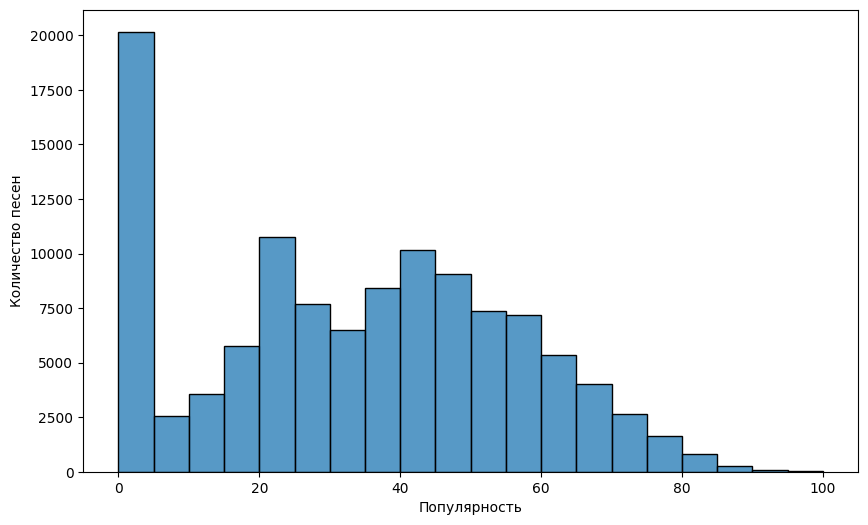

In [8]:
plt.figure(figsize=(10, 6))
histplot = sns.histplot(data=df, x='popularity', bins=20)

plt.xlabel("Популярность")
plt.ylabel("Количество песен")
plt.show()

***Вывод по графику:***

* Большое число песен абсолютно не пользовались популярностью. Это видно по выбросу в районе нуля.
* Треков с популярностью больше 80 - абсолютное меньшинство, а больше 90 - единицы 

# Распределение танцевальности, привлекательность и энергичности

Посмотрим на общую картину распределения ***danceability***, ***energy*** и ***valence***. Так как их диапазон значений лежит в диапазоне от 0 до 1, то рассмотрим их на одном графике. 

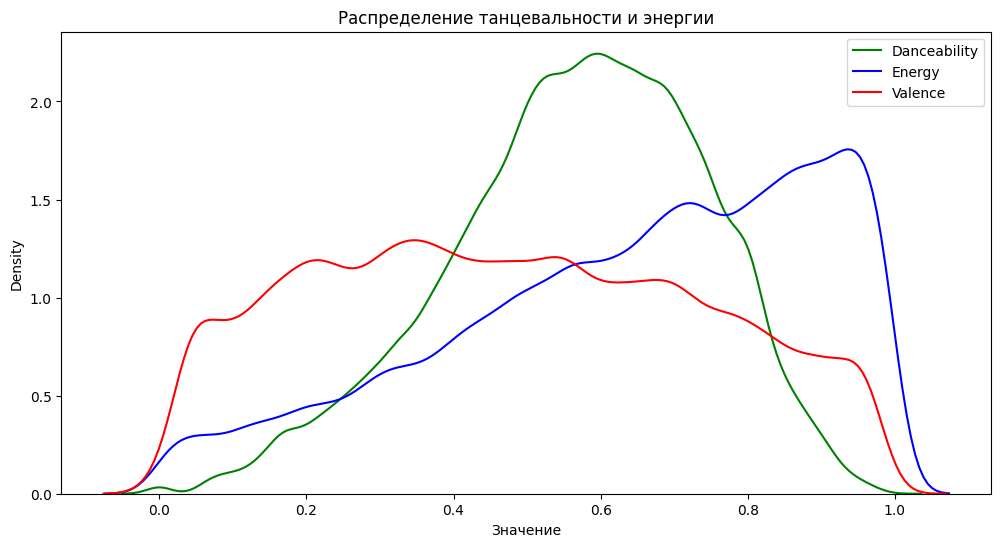

In [9]:
# Распределение танцевальности, энергичности и привлекательность
plt.figure(figsize=(12, 6))
sns.kdeplot(df['danceability'], color='green', label='Danceability')
sns.kdeplot(df['energy'], color='blue', label='Energy')
sns.kdeplot(df['valence'], color='red', label='Valence')
plt.title('Распределение танцевальности и энергии')
plt.xlabel('Значение')
plt.legend()
plt.show()

***Вывод:*** 
* *danceability:* преобладают треки со средней танцевальностью.
* *energy:* преобладают треки с высокой энергичностью.
* *valence:* треки равномерно распределены относительно эмоциональной окраски.

# Средняя популярность песен в зависимости от наличия ненормативной лексики

<Axes: xlabel='explicit', ylabel='popularity'>

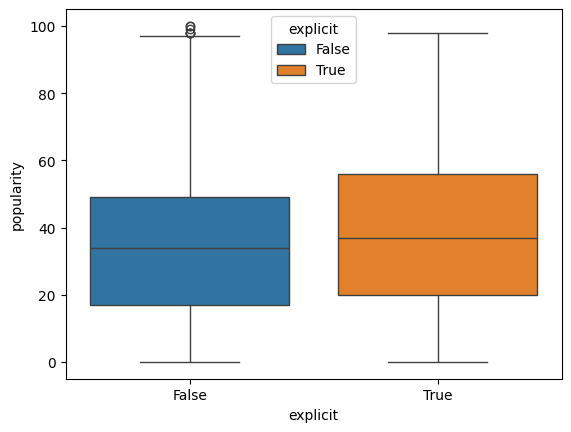

In [10]:
sns.boxplot(x='explicit', y='popularity', data=df, hue='explicit')

Треки с explicit несного популярнее, однако у треков без имеется всплеск популярных треков

# Влияние длительности трека на популярность

Так как нам привычнее воспринимать продолжительность трека в минутах, а не милисекундах, то переведём длительность треков из одной величины в другую для удобства.

In [11]:
# Переводим длительность в миллисекундах в минуты
df['duration_min'] = df['duration_ms'] / 60000
df.drop(['duration_ms'], axis=1, inplace=True)

C:\Users\Ксюша\AppData\Local\Temp\ipykernel_10212\1682713096.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration_min'] = df['duration_ms'] / 60000
C:\Users\Ксюша\AppData\Local\Temp\ipykernel_10212\1682713096.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['duration_ms'], axis=1, inplace=True)


In [12]:
# Распределим продолжительность треков по нескольким основным диапазонам и дадим им названия
bins = [0, 1, 2, 3, 4, 5, 10, df['duration_min'].max()]
labels = ['<1 мин', '1-2 мин', '2-3 мин', '3-4 мин', '4-5 мин', '5-10 мин', '>10 мин']

# Найдем диапазон с наибольшим количеством, входящих в него треков
duration_counts = df['duration_min'].value_counts(bins=bins)
print(duration_counts)

(3.0, 4.0]        42384
(2.0, 3.0]        26136
(4.0, 5.0]        22832
(5.0, 10.0]       15745
(1.0, 2.0]         5427
(-0.001, 1.0]       872
(10.0, 87.288]      603
Name: count, dtype: int64


***Вывод:*** Наиболее частая продолжительность треков находится в диапазоне ***от 3 до 4 минут***. Стоит проверить, влияет ли продолжительность трека на его популярность

Построим ***график влияния длительности трека на популярность***

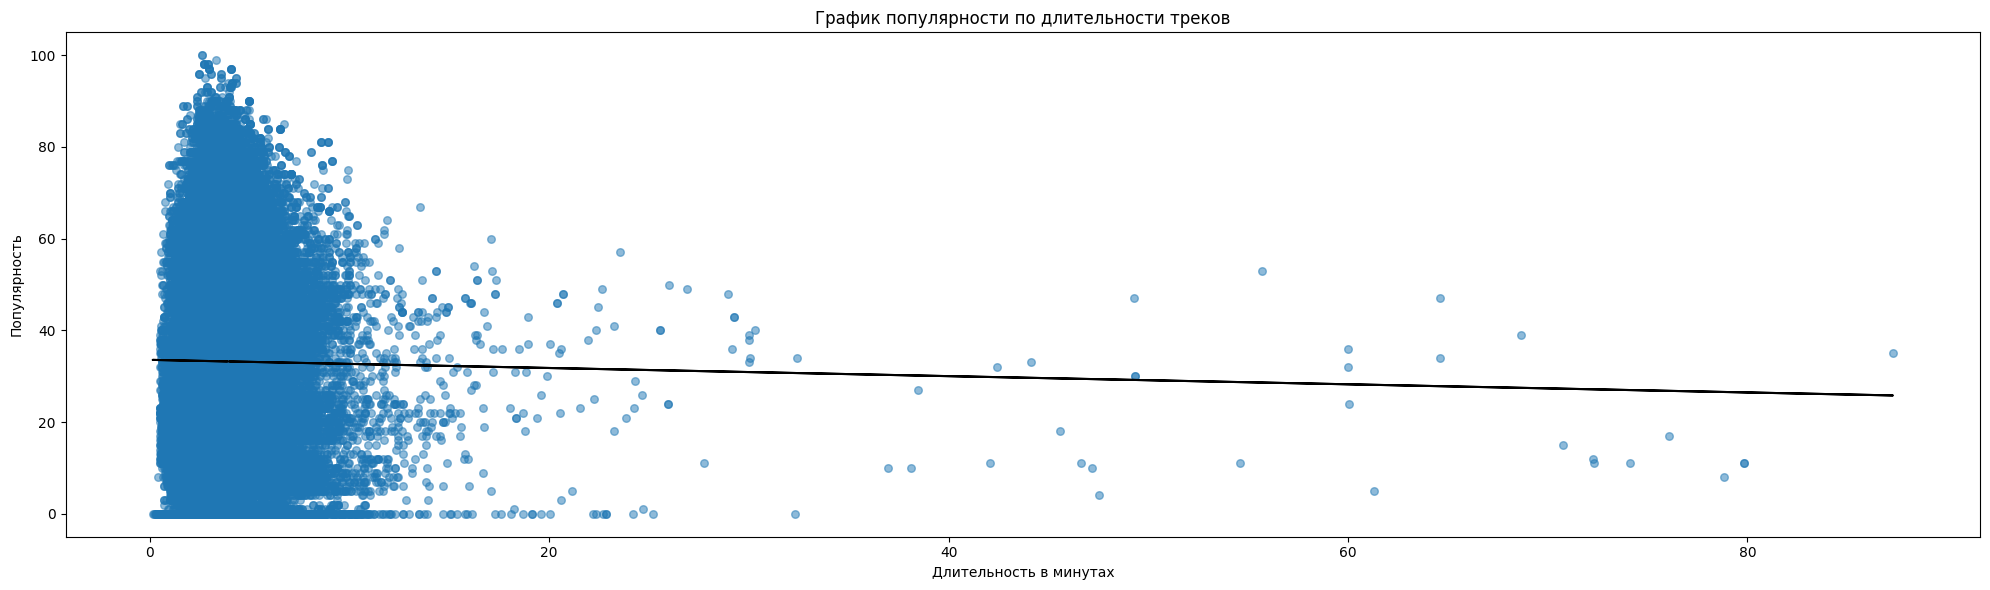

In [13]:
plt.figure(figsize=(20, 6))
plt.scatter(df['duration_min'], df['popularity'], s=30, alpha=0.5)
plt.plot(df['duration_min'], np.poly1d(np.polyfit(df['duration_min'], df['popularity'], 1))(df['duration_min']), color='black')

plt.xlabel('Длительность в минутах')
plt.ylabel('Популярность')

plt.title('График популярности по длительности треков')

plt.tight_layout()
plt.show()

***Вывод:*** Длительность наиболее популярных треков лежит в диапазоне ***от 3 до 4 минут***. Этот диапазон также является диапазоном, в который входит наибольшее число треков. Можно предположить, что длительность трека может влиять на популярность.

# Зависимость популярности от жанра

Определим количественное соотношение треков по жанрам, чтобы понять, насколько равномерно распределены данные.

In [14]:
# Найдем количество треков для каждого жанра
track_genre_counts = df['track_genre'].value_counts()
print(track_genre_counts)

track_genre
acoustic       1000
afrobeat       1000
alt-rock       1000
alternative    1000
ambient        1000
               ... 
techno         1000
turkish        1000
trip-hop       1000
world-music    1000
k-pop           999
Name: count, Length: 114, dtype: int64


In [15]:
unique_counts = set(list(track_genre_counts.values))
print(f"Уникальные количества треков внутри каждого жанра: {unique_counts}")

Уникальные количества треков внутри каждого жанра: {np.int64(1000), np.int64(999)}


***Вывод:*** На каждый жанр приходится по ***1000 треков***, данные распределены равномерно.

Построим ***график 5 самых популярных жанров***

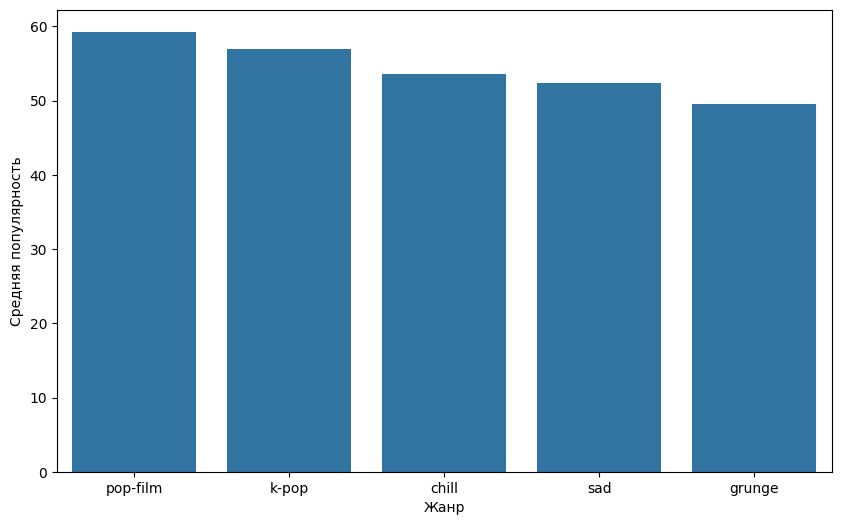

In [16]:
# Выбираем 5 самых популярных жанров
top_10_genres = df.groupby('track_genre')['popularity'].mean().sort_values(ascending=False).head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_genres.index, y=top_10_genres.values)

plt.xlabel('Жанр')
plt.ylabel('Средняя популярность')
plt.show()

***Вывод:*** Самые популярные жанры связаны с массовой культурой: pop, k-pop, pop-film, так же есть жанры описывающие настроение, которое можно приписать множеству треков: sad, chill.

# Переведем катигориальные колонки к числовому типу

In [17]:
from sklearn.preprocessing import LabelEncoder

# Создаем копию датасета, чтобы не изменять оригинал
df_encoded = df.copy()

# Определяем категориальные признаки
categorical_columns = df.select_dtypes(include=['object', 'bool', 'category']).columns

# Применяем LabelEncoder к каждому категориальному признаку
label_encoders = {} 
for col in categorical_columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

# Проверяем результат
print(df_encoded.head())

   Unnamed: 0  track_id  artists  album_name  track_name  popularity  \
0           0     62845    10357        8100       11741          73   
1           1     55667     3287       14796       22528          55   
2           2     19766    12397       39162       60774          57   
3           3     77941    14839        8580        9580          71   
4           4     68241     5255       16899       25689          82   

   explicit  danceability  energy  key  ...  mode  speechiness  acousticness  \
0         0         0.676  0.4610    1  ...     0       0.1430        0.0322   
1         0         0.420  0.1660    1  ...     1       0.0763        0.9240   
2         0         0.438  0.3590    0  ...     1       0.0557        0.2100   
3         0         0.266  0.0596    0  ...     1       0.0363        0.9050   
4         0         0.618  0.4430    2  ...     1       0.0526        0.4690   

   instrumentalness  liveness  valence    tempo  time_signature  track_genre  \
0     

# Построим корреляционную матрицу для всего датасета

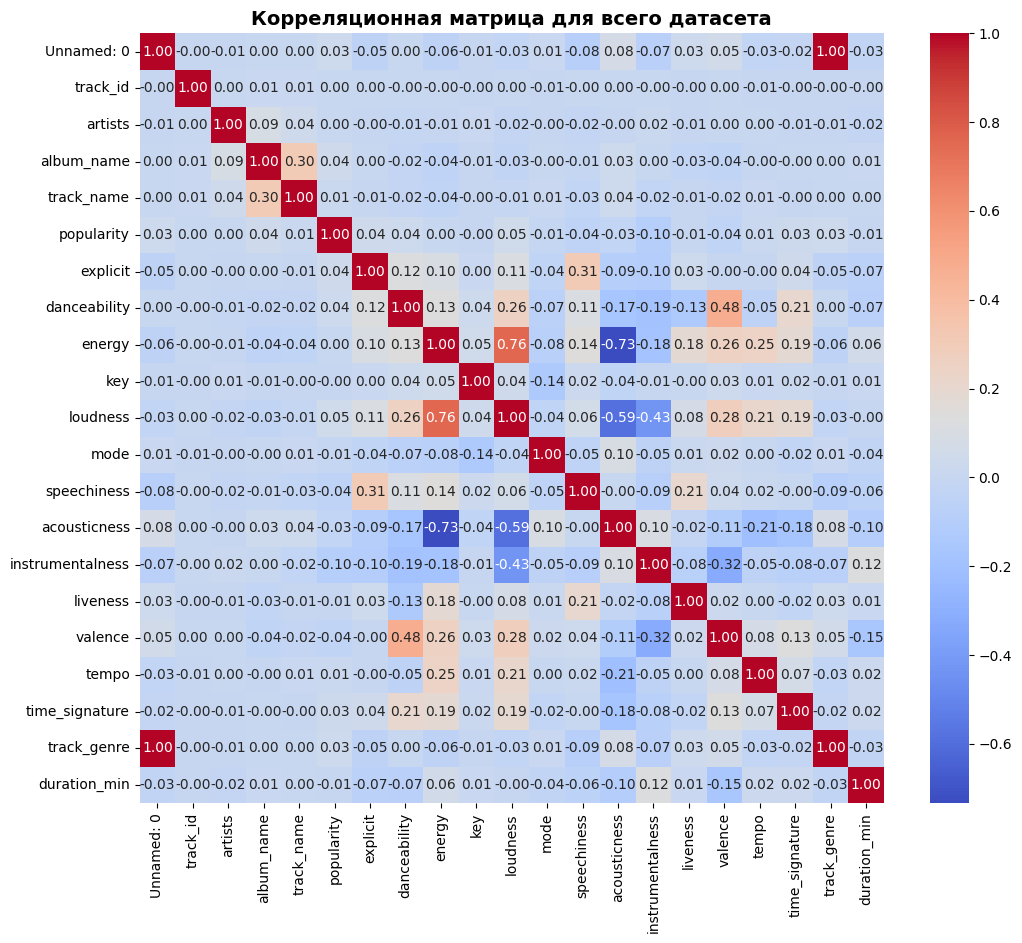

In [18]:
# Вычисляем корреляционную матрицу
corr_matrix = df_encoded.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Корреляционная матрица для всего датасета", fontsize=14, weight='bold')
plt.show()

***Вывод:*** 
* Ярко выраженной корреляции популярности по какому либо признаку не выявилось.
* *energy* и *loudness* имеют сильную положительную корреляцию 
* *danceability* имеет среднюю положительную корреляцию с *loudness* и *valence*
* *acousticness* имеет сильную отрицательную корреляцию с *energy* и *loudness* 

Найдем корреляционную матрицу для ***5 самых популярных жанров***. Этот способ может помочь выявить закономерность благодяра нескольким гипотезам:
1. Для каждого жанра равномерно распределено количество треков, значит средняя популяhность устойчива к колебаниям.
2. Каждый жанр имеет отличительные черты, объединяющие треки, которые относятся к этому жанру.

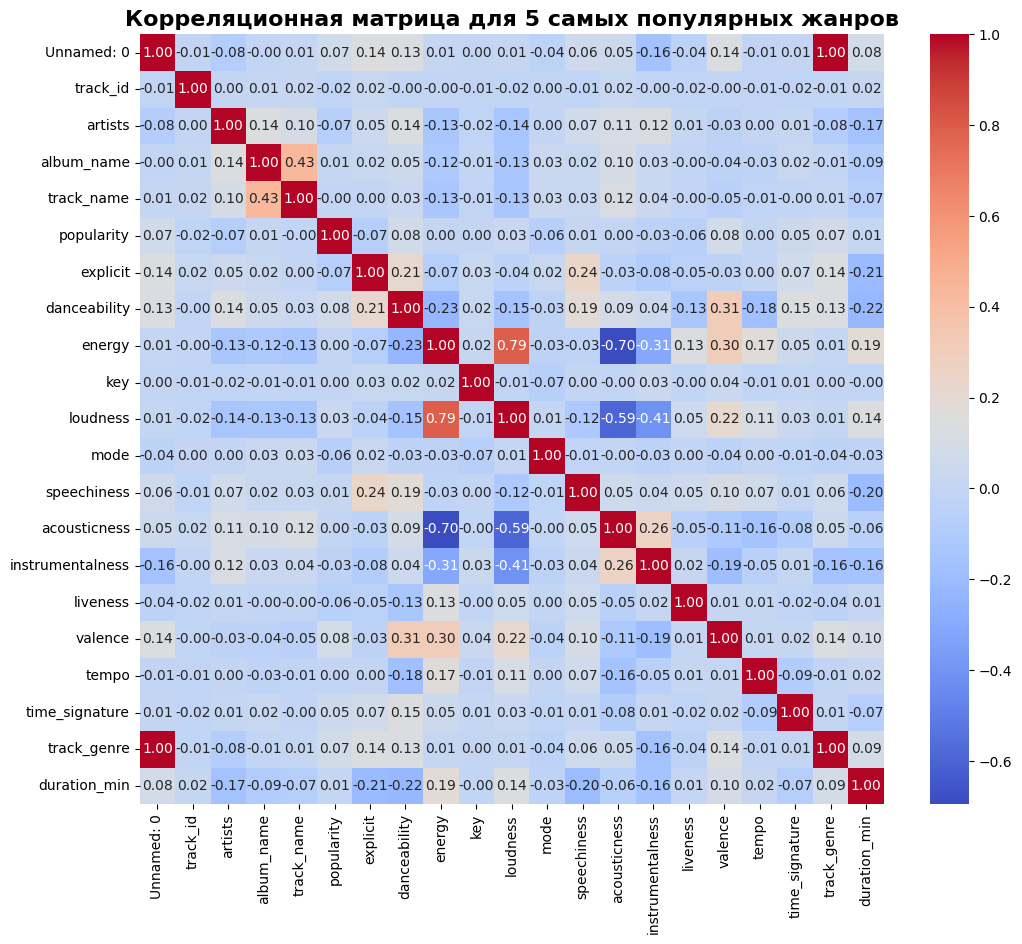

In [19]:
# Найдем 5 самых популярных жанров
top_5_genres_df = df_encoded.groupby('track_genre')['popularity'].mean().sort_values(ascending=False).head(5)

# Фильтруем датафрейм по 5 самым популярным жанрам
top_5_genres_filtered = df_encoded[df_encoded['track_genre'].isin(top_5_genres_df.index)]

# Вычисляем корреляционную матрицу
top_5_genres_corr = top_5_genres_filtered.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(top_5_genres_corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Корреляционная матрица для 5 самых популярных жанров", fontsize=16, weight='bold')
plt.show()

***Вывод:*** 
* Ярко выраженной корреляции популярности по какому либо признаку не выявилось. Наибольшую корреляцию имеют *danceability* и *valence* и она равна 0.8
* *energy* и *loudness* имеют сильную положительную корреляцию.
* В сравнении с матрицей по всему датасету, *loudness* и *danceability* имеют отрицательную корреляцию вместо положительной.
* *valence* имеет среднюю положительную корреляцию с *loudness*, *danceability* и *energy*
* *acousticness* имеет сильную отрицательную корреляцию с *energy* и *loudness*

Найдем корреляционную матрицу для треков, чья ***популярность не меньше 70***. Исходя из жизненного опыта, можно предположить, что популярными становятся треки, которые "заедают" в голове. За это могут отвечать некоторые определенные признаки, которые можно попытаться выявить.

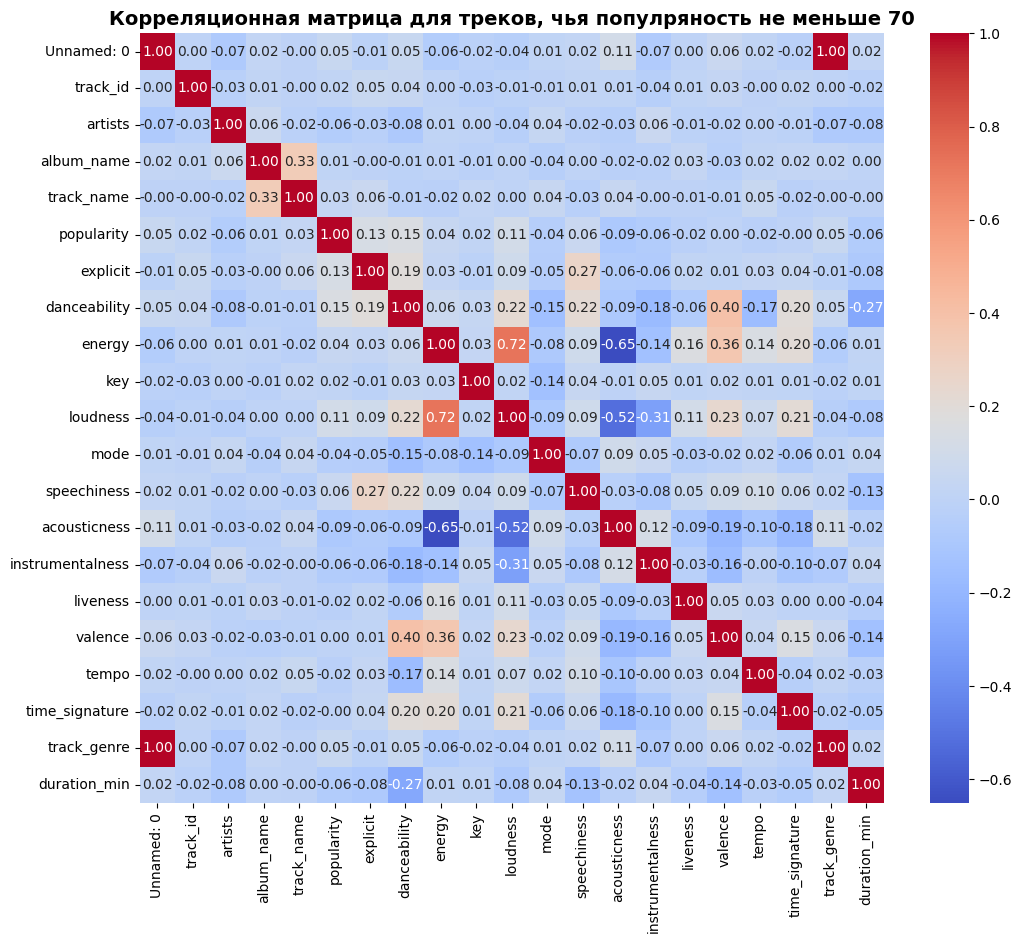

In [20]:
# Сортируем датафрейм в порядке убывания и находим треки, чья популярность не меньше 70
top_tracks_df = df_encoded[df_encoded['popularity'] >= 70].sort_values(by='popularity', ascending=False)

# Вычисляем корреляционную матрицу
top_tracks_corr = top_tracks_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(top_tracks_corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Корреляционная матрица для треков, чья популряность не меньше 70", fontsize=14, weight='bold')
plt.show()


***Вывод:*** 
* Ярко выраженной корреляции популярности с каким либо признаком не выявилось. Наибольшую корреляцию имеют *danceability* и *explicit* и она равна 0.15 и 0.11 соответственно
* *energy* и *loudness* имеют сильную положительную корреляцию.
* *valence* имеет среднюю положительную корреляцию с *loudness*, *danceability* и *energy*
* *acousticness* имеет сильную отрицательную корреляцию с *energy* и *loudness*
* Выводы по этой матрице схожи с выводами по матрице всего датасета

***Общий вывод:***

* *energy* и *loudness* сильно коррелируют друг с другом, поэтому можно создать общий признак на их основе
* можно создать общий признак на основе *valence + loudness/danceability/energy* из-за их положительной корреляции друг с другом
* создать признак, в котором будет записано, является трек синглом или частью альбома
* сильно корреляции популярности с каким либо признаком не обнаружено

# Feature Engeneering

In [21]:
# Удаляем индексы, так как он не несет информации
df.drop(['Unnamed: 0', 'track_id'],axis=1, inplace=True)

C:\Users\Ксюша\AppData\Local\Temp\ipykernel_10212\920432895.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['Unnamed: 0', 'track_id'],axis=1, inplace=True)


Создадим новое свойство, в котором будем записывать, является ли трек синглом или был выпущен в составе альбома. Возможно, на популярность может влиять этот параметр и это поможет улучшить метрики.

In [22]:
# Создаем новый столбец "is_single"
df['is_single'] = df['album_name'].map(df['album_name'].value_counts()) == 1

# Преобразуем булевый столбец в понятное обозначение
df['is_single'] = df['is_single'].replace({True: 'Single', False: 'Album'})


C:\Users\Ксюша\AppData\Local\Temp\ipykernel_10212\1879807879.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_single'] = df['album_name'].map(df['album_name'].value_counts()) == 1
C:\Users\Ксюша\AppData\Local\Temp\ipykernel_10212\1879807879.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_single'] = df['is_single'].replace({True: 'Single', False: 'Album'})


Так как energy и loudness сильно коррелируют друг с другом, то можно объединить их в один признак.

In [23]:
# Создаем новый признак, обобщающий энергичность и громкость
df['energy_loudness_ration'] = df['energy'] * df['loudness']

C:\Users\Ксюша\AppData\Local\Temp\ipykernel_10212\1726037667.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['energy_loudness_ration'] = df['energy'] * df['loudness']


Также можно создать новый признак на основе акустичности и инструментальности, который покажет, к какому из этих полюсов трек тяготеет больше.

In [24]:
# Создаем новый признак с отношением акустичности к инструментальности
df['acoustic_to_instrumental_ratio'] = df['acousticness'] / (df['instrumentalness'] + 1e-6)

C:\Users\Ксюша\AppData\Local\Temp\ipykernel_10212\1426478627.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['acoustic_to_instrumental_ratio'] = df['acousticness'] / (df['instrumentalness'] + 1e-6)


Этот признак будет показывать уровень оптимизма и танцевальности трека одновременно, так как они неплохо коррелируют между собой. Если оба значения высоки, то результат будет тоже высоким, что может отражать радостные и танцевальные треки.

In [25]:
# Создаем новый признак на основе danceability/energy и valence
df['dance_valence_ratio'] = df['danceability'] * df['valence']
df['energy_valence_ratio'] = df['energy'] * df['valence']

C:\Users\Ксюша\AppData\Local\Temp\ipykernel_10212\553877781.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dance_valence_ratio'] = df['danceability'] * df['valence']
C:\Users\Ксюша\AppData\Local\Temp\ipykernel_10212\553877781.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['energy_valence_ratio'] = df['energy'] * df['valence']


Создадим признак, определяющий количество выпущенных треков у каждого артиста.

In [26]:
# Создадим признак частоты релизов треков по артисту
number_of_tracks = df.groupby('artists')['popularity'].count()

df = pd.merge(df, number_of_tracks.reset_index(), 
                    on='artists', how='left')

# Изменяем названия столбцов
df = df.rename(columns={'popularity_y': 'artists_count', 
                                'popularity_x': 'popularity'})

In [27]:
df

,artists,album_name,track_name,popularity,explicit,danceability,energy,key,loudness,mode,...,tempo,time_signature,track_genre,duration_min,is_single,energy_loudness_ration,acoustic_to_instrumental_ratio,dance_valence_ratio,energy_valence_ratio,artists_count
0,Gen Hoshino,Comedy,Comedy,73,False,0.676,0.4610,1,-6.746,0,...,87.917,4,acoustic,3.844433,Album,-3.109906,16019.900498,0.483340,0.329615,10
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,False,0.420,0.1660,1,-17.235,1,...,77.489,4,acoustic,2.493500,Album,-2.861010,140853.658537,0.112140,0.044322,13
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,False,0.438,0.3590,0,-9.734,1,...,76.332,4,acoustic,3.513767,Single,-3.494506,210000.000000,0.052560,0.043080,1
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,False,0.266,0.0596,0,-18.515,1,...,181.740,3,acoustic,3.365550,Single,-1.103494,12622.036262,0.038038,0.008523,15
4,Chord Overstreet,Hold On,Hold On,82,False,0.618,0.4430,2,-9.681,1,...,119.949,4,acoustic,3.314217,Album,-4.288683,469000.000000,0.103206,0.073981,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113994,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,False,0.172,0.2350,5,-16.393,1,...,125.995,5,world-music,6.416650,Album,-3.852355,0.689654,0.005831,0.007966,4
113995,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,False,0.174,0.1170,0,-18.318,0,...,85.239,4,world-music,6.416667,Album,-2.143206,1.018442,0.006090,0.004095,4
113996,Cesária Evora,Best Of,Miss Perfumado,22,False,0.629,0.3290,0,-10.895,0,...,132.378,4,world-music,4.524433,Album,-3.584455,867000.000000,0.467347,0.244447,14
113997,Michael W. Smith,Change Your World,Friends,41,False,0.587,0.5060,7,-10.889,1,...,135.960,4,world-music,4.731550,Album,-5.509834,381000.000000,0.242431,0.208978,30


Разобьем энергичность и танцевальность на категории.

In [28]:
df['energy_category'] = pd.qcut(df['energy'], q=3, labels=['Низкая', 'Средняя', 'Высокая'])
df['danceability_category'] = pd.qcut(df['danceability'], q=3, labels=['Низкая', 'Средняя', 'Высокая'])

# Обучение моделей

Снова обработаем категориальные признаки, появившиеся после этапа feature engeneering

In [30]:
from sklearn.preprocessing import LabelEncoder

# Создаем копию датасета, чтобы не изменять оригинал
df_encoded = df.copy()

# Определяем категориальные признаки
categorical_columns = df.select_dtypes(include=['object', 'bool', 'category']).columns

# Применяем LabelEncoder к каждому категориальному признаку
label_encoders = {} 
for col in categorical_columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

In [31]:
# Разделение данных на обучающую и тестовую выборки
X = df_encoded.drop(columns=['popularity'])
y = df_encoded['popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Нейронная модель

In [62]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import regularizers

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

Epoch 1/20
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 649.4479 - val_loss: 461.4113
Epoch 2/20
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 470.2239 - val_loss: 453.1467
Epoch 3/20
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 457.9209 - val_loss: 449.3035
Epoch 4/20
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 457.4677 - val_loss: 446.5438
Epoch 5/20
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 455.8205 - val_loss: 445.4291
Epoch 6/20
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 451.9827 - val_loss: 442.8815
Epoch 7/20
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 448.3106 - val_loss: 440.8307
Epoch 8/20
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 444.8459 - val_loss: 437.7838
Epoch 9/20
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 440.3678 - val_loss: 437.6490
Epoch 10/20
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 440.2953 - val_loss: 437.8578
Epoch 11/20
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 437.7746 - val_

In [69]:
from sklearn.metrics import mean_absolute_percentage_error, r2_score

y_pred = model.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = mse ** 0.5
mape = mape * 100
R2 = r2_score(y_test, y_pred)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f"R^2: {R2}")
print(f'MAPE: {mape}')

MSE: 469.90963158492366
MAE: 18.077065731648908
RMSE: 21.677399096407385
R^2: 0.05277241970616098
MAPE: 2.020840767628605e+18


Данная модель показала худшие результаты среди остальных. 

Лучшие результаты:  
MSE: 469.90963158492366  
MAE: 18.077065731648908  
RMSE: 21.677399096407385  
R^2: 0.05277241970616098  
MAPE: 2.020840767628605e+18

713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
713/713 ━━━━━━━━

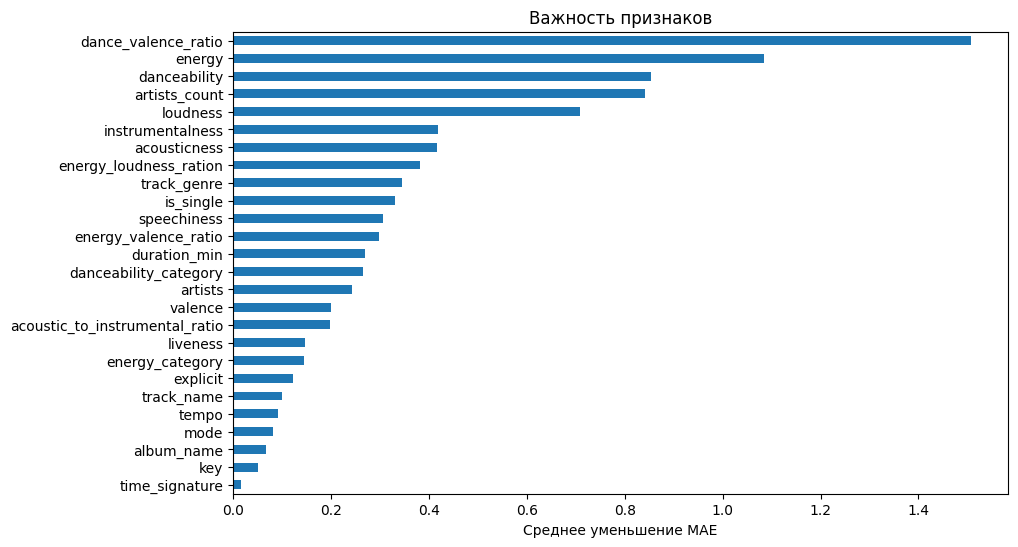

In [64]:
# Важность признаков с помощью permutation importance
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, scoring='neg_mean_absolute_error')
importances = pd.Series(result.importances_mean, index=X.columns)

# Визуализация важности признаков
importances.sort_values().plot(kind='barh', figsize=(10,6))
plt.title('Важность признаков')
plt.xlabel('Среднее уменьшение MAE')
plt.show()

***Наиболее важные признаки:***
1. dance_valence_ratio (созданный)
2. energy
3. danceability
4. artists_count
5. loudness

***Наименее важные:***
1. time_signature
2. key
3. album_name
4. mode
5. tempo

# Random Forest Regressor

In [74]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np

rf_model = RandomForestRegressor(max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
mape = mean_absolute_percentage_error(y_test, y_pred_rf)
rmse = mse ** 0.5
mape = mape * 100
R2 = r2_score(y_test, y_pred_rf)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f"R^2: {R2}")
print(f'MAPE: {mape}')


MSE: 356.24451758240946
MAE: 15.076810622259792
RMSE: 18.874440854828244
R^2: 0.2818946246230589
MAPE: 1.612688437195487e+18


Эта модель показала худшие результаты относительно рассматриваемых

Лучшие результаты

MSE: 356.24451758240946  
MAE: 15.076810622259792  
RMSE: 18.874440854828244  
R^2: 0.05277241970616098  
MAPE: 1.612688437195487e+18

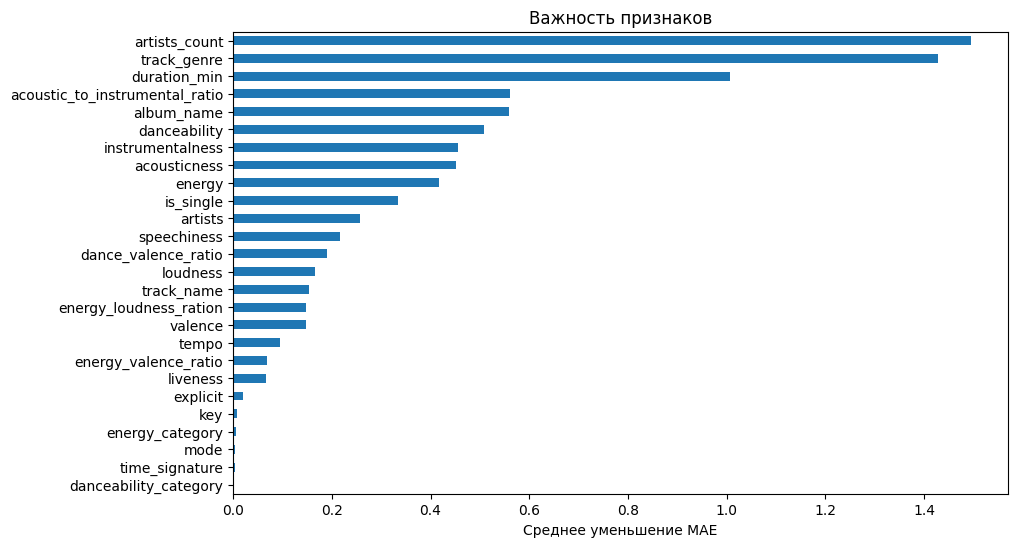

In [77]:
result = permutation_importance(rf_model, X_test, y_test, n_repeats=10, random_state=42, scoring='neg_mean_absolute_error')
importances = pd.Series(result.importances_mean, index=X.columns)

# Визуализация важности признаков
importances.sort_values().plot(kind='barh', figsize=(10,6))
plt.title('Важность признаков')
plt.xlabel('Среднее уменьшение MAE')
plt.show()

***Наиболее важные признаки:***
1. artists_count
2. track_genre
3. duration_min
4. acoustic to instrumental ratio
5. album_name

***Наименее важные:***
1. danceability_category
2. time_signature
3. mode
4. energy_category
5. key

# Gradient Boosting Regressor

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

gbr_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

gbr_model.fit(X_train, y_train)

y_pred_gb = gbr_model.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred_gb)
mse = mean_squared_error(y_test, y_pred_gb)
mape = mean_absolute_percentage_error(y_test, y_pred_gb)
rmse = mse ** 0.5
mape = mape * 100
R2 = r2_score(y_test, y_pred_gb)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f"R^2: {R2}")
print(f'MAPE: {mape}')


MSE: 378.01207047537883
MAE: 15.782455960196081
RMSE: 19.442532511876607
R^2: 0.23801634448187126
MAPE: 1.7251191345109612e+18


Эта модель показала результаты, сравнимые с нейронной


MSE: 378.01207047537883  
MAE: 15.782455960196081  
RMSE: 19.442532511876607  
R^2: 0.23801634448187126  
MAPE: 1.7251191345109612e+18  

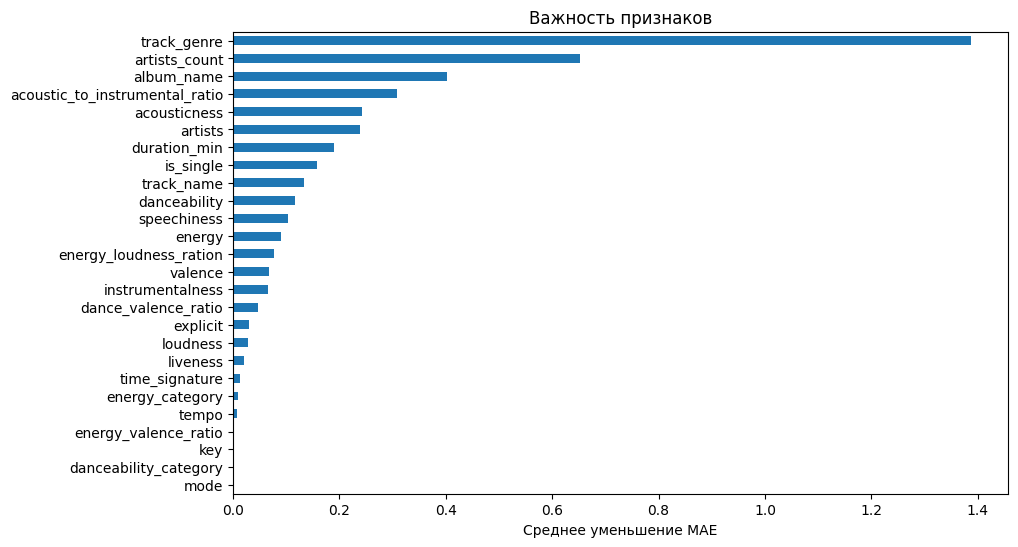

In [78]:
result = permutation_importance(gbr_model, X_test, y_test, n_repeats=10, random_state=42, scoring='neg_mean_absolute_error')
importances = pd.Series(result.importances_mean, index=X.columns)

# Визуализация важности признаков
importances.sort_values().plot(kind='barh', figsize=(10,6))
plt.title('Важность признаков')
plt.xlabel('Среднее уменьшение MAE')
plt.show()

***Наиболее важные признаки:***
1. track_genre
2. artists_count
3. album_name
4. acoustic to instrumental ratio
5. acousticness

***Наименее важные:***
1. mode
2. danceability_category
3. key
4. energy_valence_ratio
5. tempo

# Linear Regression

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

model = LinearRegression()
model.fit(X_train, y_train)

y_pred_lr = model.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred_lr)
mse = mean_squared_error(y_test, y_pred_lr)
mape = mean_absolute_percentage_error(y_test, y_pred_lr)
rmse = mse ** 0.5
mape = mape * 100
R2 = r2_score(y_test, y_pred_lr)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f"R^2: {R2}")
print(f'MAPE: {mape}')

MSE: 469.90963158492366
MAE: 18.077065731648908
RMSE: 21.677399096407385
R^2: 0.05277241970616098
MAPE: 2.020840767628604e+18


Эта модель показала более худшие результаты относительно нейронной

MSE: 469.90963158492366  
MAE: 18.077065731648908  
RMSE: 21.677399096407385  
R^2: 0.05277241970616098  
MAPE: 2.020840767628604e+18

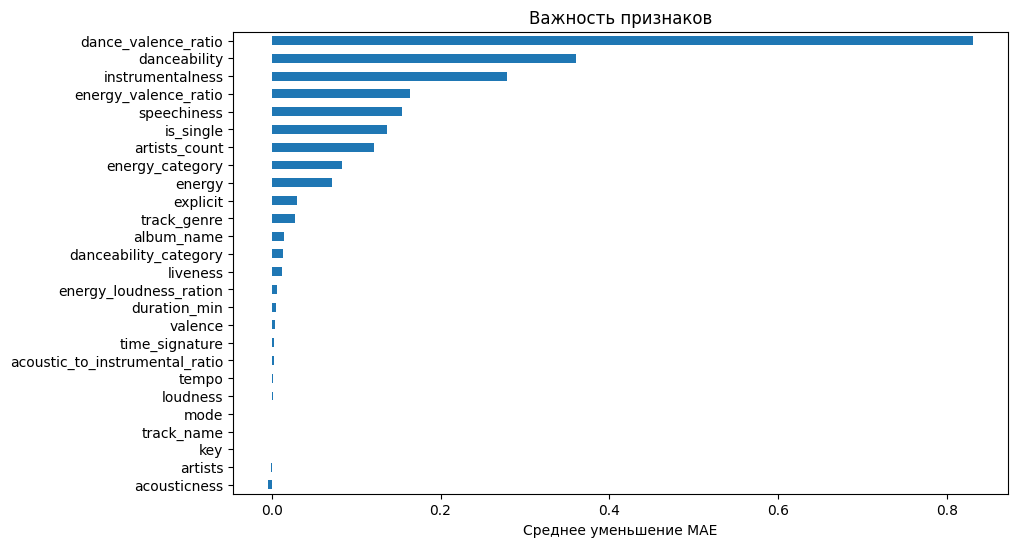

In [81]:
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, scoring='neg_mean_absolute_error')
importances = pd.Series(result.importances_mean, index=X.columns)

# Визуализация важности признаков
importances.sort_values().plot(kind='barh', figsize=(10,6))
plt.title('Важность признаков')
plt.xlabel('Среднее уменьшение MAE')
plt.show()

***Наиболее важные признаки:***
1. dance_valence_ratio
2. danceability
3. instrumentalness
4. energy valence ratio
5. speechness

***Наименее важные:***
1. acousticness
2. artists
3. key
4. track_name
5. mode

# Кросс-валидация

Для кросс валидации была выбрана RandomForestRegressor, так как она имеет лучшие метрики

In [35]:
from sklearn.model_selection import GridSearchCV, KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


param_grid = {
'max_depth': [5,10,20],
'max_features' : [5,10,20],
'n_estimators': [20,50]}
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),                           
    param_grid=param_grid,cv=KFold(n_splits=5, shuffle=True, random_state=42))
grid_search.fit(X_train, y_train)



GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [5, 10, 20], 'max_features': [5, 10, 20],
                         'n_estimators': [20, 50]})

In [53]:
grid_search.best_params_

{'max_depth': 20, 'max_features': 20, 'n_estimators': 50}

In [70]:
R2 = grid_search.score(X_test, y_test) 
print(f"R^2: {R2}")

R^2: 0.5737249735336398


In [61]:
grid_search.cv_results_

{'mean_fit_time': array([ 3.24850125,  8.00321379,  5.71849685, 13.9855938 , 10.83690214,
        29.8210341 ,  5.73008218, 15.24281607, 10.63107915, 31.99078274,
        25.90635376, 67.99242506,  8.91178436, 21.60923586, 17.71941934,
        43.16464949, 35.79225707, 88.54253435]),
 'std_fit_time': array([ 0.29973173,  1.28175066,  0.19199816,  0.20773917,  0.19469914,
         2.72589852,  0.39247208,  1.88375017,  0.28251393,  3.28717982,
         1.5724267 , 16.95871532,  0.391572  ,  0.27571148,  1.74203822,
         0.99821197,  2.13945964,  2.16965543]),
 'mean_score_time': array([0.02312107, 0.06377702, 0.02176528, 0.05258608, 0.0243382 ,
        0.05631528, 0.04392409, 0.10159998, 0.04224429, 0.12562575,
        0.05114741, 0.10771232, 0.10415497, 0.24070101, 0.10003371,
        0.27306948, 0.11581416, 0.25739179]),
 'std_score_time': array([0.00235343, 0.01665734, 0.00128984, 0.00159119, 0.00202415,
        0.00820395, 0.00199451, 0.00313374, 0.0015011 , 0.01263874,
        

Для удобства посчитам отдельно значения метрики с лучшими параметрами

In [68]:
from sklearn.model_selection import GridSearchCV, KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


param_grid = {
'max_depth': [20],
'max_features' : [20],
'n_estimators': [50]}
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),                           
    param_grid=param_grid, verbose=4, cv=KFold(n_splits=5, shuffle=True, random_state=42))
grid_search.fit(X_train, y_train)



Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END max_depth=20, max_features=20, n_estimators=50;, score=0.547 total time= 1.5min
[CV 2/5] END max_depth=20, max_features=20, n_estimators=50;, score=0.549 total time= 1.5min
[CV 3/5] END max_depth=20, max_features=20, n_estimators=50;, score=0.545 total time= 1.5min
[CV 4/5] END max_depth=20, max_features=20, n_estimators=50;, score=0.534 total time= 1.8min
[CV 5/5] END max_depth=20, max_features=20, n_estimators=50;, score=0.543 total time= 1.6min


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [20], 'max_features': [20],
                         'n_estimators': [50]},
             verbose=4)

Результат показателя R^2 кросс-валидации о 5 фолдам:
 1. score=0.547
 2. score=0.549
 3. score=0.545
 4. score=0.534
 5. score=0.543
среднее: 0,5436
Так как метрика стабильна для всех фолдов, можно сделать вывод, что модель стабильна.

# Вывод:

Были проведены широкие исследования в области обработки данных и создания машинных обучений. Процесс включал несколько ключевых шагов:

- Подготовка исходной информации к анализу 
- Разделение набора данных на части для обучения и проверки • Применение методов кросс-валидации для оценки эффективности разработанных моделей

Этот подход позволил провести комплексную оценку различных алгоритмов машинного обучения и получить представление о их надежности и точности при работе с данными.

## Сравнение с другими моделями:

Модель RandomForestRegressor показала наилучшие результаты среди других моделей, нейронная показала и Linear Regression себя значительно хуже по метрикам средних ошибок, Gradient Boosting значительно хуже по R^2.

## Кросс-валидация:

Были выбраны параметры, позволяющие увеличить точность модели, посчитано R^2 для всех 5 фолдов. Мы убедились, что модель стабильна

## Важность признаков:

Модель показала, что в значительной степени опирается на количество треков у исполнителя, однако есть и ещё несколько довольно важных параметров